# Analysis of Movie Run Time relative to primary outcome: Net Income # 

Importing Packages

In [1]:
#package import
import pandas as pd 
import matplotlib.pyplot as plt
import sqlite3

Specifying all file paths in one centralized locatio.

In [2]:
#file_paths
tn_budgets_file_path = './../Data/Phase_1_Project_Data/tn.movie_budgets.csv.gz'
imdb_file_path = './../Data/Phase_1_Project_Data/im.db'

Loading in our datasets

In [3]:
#Using pandas to create a dataframe from the tn.movie_budgets csv file
tn_budgets_df = pd.read_csv(tn_budgets_file_path)

In [4]:
# ensuring that the file was loaded correctly
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
# creating a sqlite3 connection to be able to read in our SQL database 
conn = sqlite3.connect(imdb_file_path) 

# using pandas to read in our SQL database im.db
# SELECT * because we need to see what tables are in this database
imdb_db = pd.read_sql('''
                               SELECT
                               *
                               FROM sqlite_master
                               ''', conn)

In [6]:
# take a look at our dataframe to make sure it was read correctly
imdb_db

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [7]:
# Create a dataframe with the columns needed from the movie_basics table
imdb_table = pd.read_sql('''
                            SELECT
                               movie_basics.movie_id, movie_basics.primary_title, movie_basics.runtime_minutes
                               FROM movie_basics
                               INNER JOIN movie_akas ON movie_basics.movie_id = movie_akas.movie_id
                                WHERE is_original_title != 0.0
                               ''', conn)

In [8]:
# take a look at our dataframe to make sure it was read correctly
imdb_table.head()

,movie_id,primary_title,runtime_minutes
0,tt0369610,Jurassic World,124.0
1,tt0401729,John Carter,132.0
2,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,52.0
3,tt10027708,Miguelito,94.0
4,tt10050722,Thing I Don't Get,71.0


In [9]:
# Cleaning the production_budget column by removing all of the commas and the dollar sign then converting the 
# value to a float
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget'].str.replace(",","")
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget_float'].str[1:]
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget_float'].astype(float)

In [10]:
# Cleaning the domestic_gross column by removing all of the commas and the dollar sign then converting the 
# value to a float
tn_budgets_df['domestic_gross_float'] = tn_budgets_df['domestic_gross'].str.replace(",","")
tn_budgets_df['domestic_gross_float'] = tn_budgets_df['domestic_gross_float'].str[1:]
tn_budgets_df['domestic_gross_float'] = tn_budgets_df['domestic_gross_float'].astype(float)

In [11]:
# Cleaning the worldwide_gross column by removing all of the commas and the dollar sign then converting the 
# value to a float
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross'].str.replace(",","")
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross_float'].str[1:]
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross_float'].astype(float)

In [12]:
# Deleting all the rows that have a value of zero in the columns 'production_budget_float','worldwide_gross_float' 
# or 'domestic_gross_float'
tn_budgets_df = tn_budgets_df[tn_budgets_df['production_budget_float'] != 0]
tn_budgets_df = tn_budgets_df[tn_budgets_df['worldwide_gross_float'] != 0]
tn_budgets_df = tn_budgets_df[tn_budgets_df['domestic_gross_float'] != 0]

#sanity check
#tn_budgets_df.loc[tn_budgets_df['domestic_gross_float'] == 0]
#tn_budgets_df.loc[tn_budgets_df['worldwide_gross_float'] == 0]
#tn_budgets_df.loc[tn_budgets_df['production_budget_float'] == 0]

In [13]:

tn_budgets_df['gross_revenue'] = tn_budgets_df['worldwide_gross_float'] - tn_budgets_df['production_budget_float']
tn_budgets_df = tn_budgets_df.loc[tn_budgets_df['gross_revenue'] != 0]

In [14]:
#tn_budgets_df = tn_budgets_df.drop(['production_budget_int','worldwide_gross_int'],axis=1)
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_float,domestic_gross_float,worldwide_gross_float,gross_revenue
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [15]:
#attempting to join the tables
title_and_revenue_df = pd.merge(tn_budgets_df, imdb_table,left_on='movie',right_on='primary_title')
title_and_revenue_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_float,domestic_gross_float,worldwide_gross_float,gross_revenue,movie_id,primary_title,runtime_minutes
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Avatar,93.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000.0,241063875.0,1.045664e+09,6.350639e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.0,42762350.0,1.497624e+08,-2.002376e+08,tt6565702,Dark Phoenix,113.0
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000.0,459005868.0,1.403014e+09,1.072414e+09,tt2395427,Avengers: Age of Ultron,141.0
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000.0,678815482.0,2.048134e+09,1.748134e+09,tt4154756,Avengers: Infinity War,149.0


In [16]:

#DROP ALL THE NA
title_and_revenue_df = title_and_revenue_df.dropna(subset=['runtime_minutes','gross_revenue'])
#TAKE LENGTH
title_and_revenue_df.shape

(2066, 13)

In [17]:
#exploratory - delete later
max_runtime = title_and_revenue_df['runtime_minutes'].max()
min_runtime = title_and_revenue_df['runtime_minutes'].min()
run_time = title_and_revenue_df['runtime_minutes']
run_time = run_time.sort_values(ascending=True)
print(run_time.head(10))
print(min_runtime,max_runtime)

959      3.0
176      4.0
187      4.0
937      6.0
2072    11.0
1409    25.0
190     26.0
179     26.0
1769    41.0
916     45.0
Name: runtime_minutes, dtype: float64
3.0 280.0


Text(0.5, 1.0, 'Runtime vs Gross Revenue')

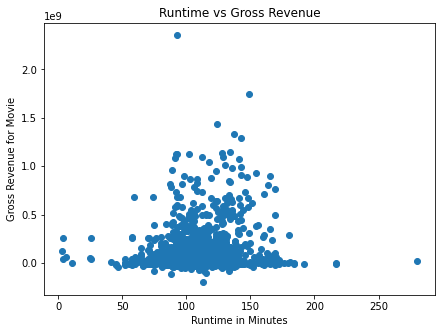

In [18]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x = title_and_revenue_df['runtime_minutes'],y = title_and_revenue_df['gross_revenue'])
ax.set_xlabel('Runtime in Minutes')
ax.set_ylabel('Gross Revenue for Movie')
ax.set_title('Runtime vs Gross Revenue')
#plt.scatter(title_and_revenue_df['runtime_minutes'],title_and_revenue_df['gross_revenue']);

In [19]:
title_and_revenue_df.loc[title_and_revenue_df['gross_revenue'] < 0]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_float,domestic_gross_float,worldwide_gross_float,gross_revenue,movie_id,primary_title,runtime_minutes
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.0,42762350.0,149762350.0,-200237650.0,tt6565702,Dark Phoenix,113.0
9,13,"Jul 2, 2013",The Lone Ranger,"$275,000,000","$89,302,115","$260,002,115",275000000.0,89302115.0,260002115.0,-14997885.0,tt1210819,The Lone Ranger,150.0
19,35,"Aug 14, 1998",The Avengers,"$60,000,000","$23,385,416","$48,585,416",60000000.0,23385416.0,48585416.0,-11414584.0,tt0848228,The Avengers,143.0
30,9,"Nov 21, 2018",Robin Hood,"$99,000,000","$30,824,628","$84,747,441",99000000.0,30824628.0,84747441.0,-14252559.0,tt0955308,Robin Hood,140.0
31,9,"Nov 21, 2018",Robin Hood,"$99,000,000","$30,824,628","$84,747,441",99000000.0,30824628.0,84747441.0,-14252559.0,tt2363363,Robin Hood,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,90,"Jun 19, 2014",The Past is a Grotesque Animal,"$100,000","$20,056","$20,056",100000.0,20056.0,20056.0,-79944.0,tt3072636,The Past is a Grotesque Animal,77.0
2110,4,"Jul 25, 2014",Happy Christmas,"$70,000","$30,312","$30,312",70000.0,30312.0,30312.0,-39688.0,tt2955096,Happy Christmas,82.0
2111,11,"Jan 25, 2013",Supporting Characters,"$60,000","$4,917","$4,917",60000.0,4917.0,4917.0,-55083.0,tt1874789,Supporting Characters,87.0
2113,20,"Jul 31, 2015",Counting,"$50,000","$8,374","$8,374",50000.0,8374.0,8374.0,-41626.0,tt4462082,Counting,111.0


In [20]:
#title_revenue[‘runtime_minutes_binned'] = title_revenue[‘runtime_minutes’].map(func)


In [21]:
def length(val):
    if val <= 27.5:
        return ">= 27.5 minutes"
    elif (val > 27.5) and (val <= 55):
        return "27.5 to 55 minutes"
    elif(val > 55) and (val <= 82.5):
        return "55 minutes to 82.5 minutes"
    elif (val > 82.5) and (val <= 110):
        return "82.5 minutes to 110 minutes"
    elif (val > 110) and (val <= 137.5):
        return "110 minutes to 137.5 minutes"
    elif (val > 137.5) and (val <= 165):
        return "137.5 minutes to 165 minutes"
    elif (val > 165) and (val <= 192.5):
        return "165 minutes to 192.5 minutes"
    elif (val > 192.5) and (val <= 220):
        return "192.5 minutes to 220 minutes"
    elif (val > 220):
        return "greater than 220 minutes"

In [22]:
title_and_revenue_df['runtime_minutes_binned'] = title_and_revenue_df['runtime_minutes'].map(length)
new_df = title_and_revenue_df.groupby(by=['runtime_minutes_binned'],as_index=False).mean()
new_df



,runtime_minutes_binned,id,production_budget_float,domestic_gross_float,worldwide_gross_float,gross_revenue,runtime_minutes
0,110 minutes to 137.5 minutes,51.671119,5.421730e+07,6.796488e+07,1.635808e+08,1.093635e+08,120.741235
1,137.5 minutes to 165 minutes,42.420000,8.399300e+07,1.153008e+08,3.122310e+08,2.282380e+08,147.510000
2,165 minutes to 192.5 minutes,48.157895,4.769474e+07,4.386021e+07,1.564138e+08,1.087190e+08,173.894737
3,192.5 minutes to 220 minutes,33.000000,1.000000e+07,3.039190e+06,4.774670e+06,-5.225330e+06,217.000000
4,27.5 to 55 minutes,56.444444,1.871111e+07,9.471641e+06,1.376230e+07,-4.948812e+06,49.000000
5,55 minutes to 82.5 minutes,49.045455,2.944071e+07,3.812898e+07,8.237141e+07,5.293069e+07,73.984848
6,82.5 minutes to 110 minutes,51.877926,3.248315e+07,4.135322e+07,9.826354e+07,6.578038e+07,97.841137
7,>= 27.5 minutes,56.500000,4.115625e+07,6.920745e+07,1.477400e+08,1.065837e+08,13.125000
8,greater than 220 minutes,22.000000,3.000000e+07,3.691881e+07,5.107854e+07,2.107854e+07,280.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

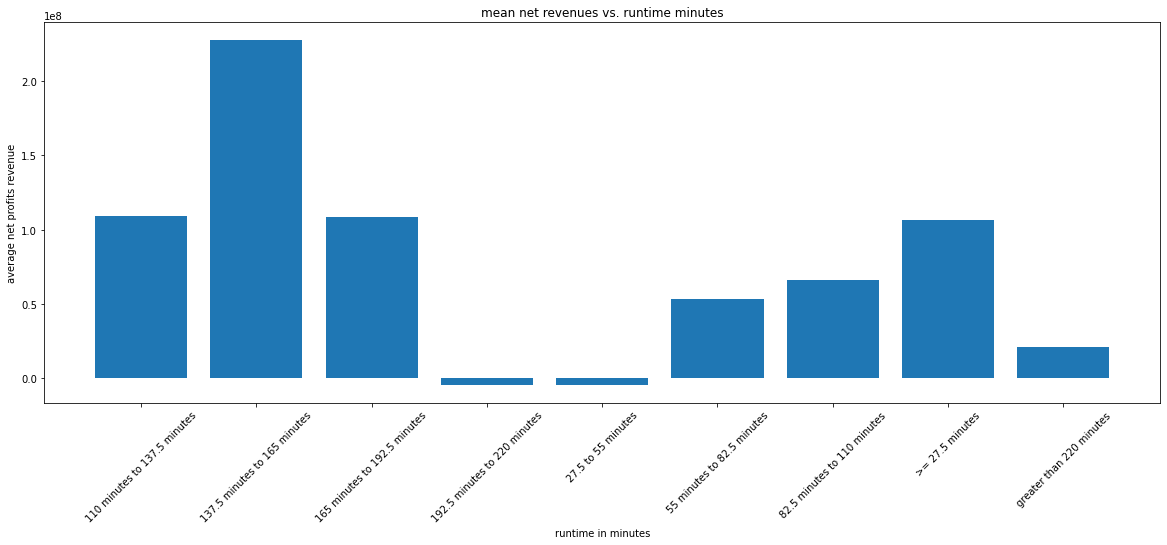

In [24]:
#plot these bins
fig,ax = plt.subplots(figsize = (20,7))
ax.bar(new_df['runtime_minutes_binned'],new_df['gross_revenue'])
ax.set_xlabel('runtime in minutes')
ax.set_ylabel('average net profits revenue')
ax.set_title('mean net revenues vs. runtime minutes')
plt.xticks(rotation=45);

In [ ]:
# save visualization to desktop